<a href="https://colab.research.google.com/github/Joseikwang/Time-Series/blob/main/HYPOTHESIS_TESTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# step 1: Creat a sample dataset
np.random.seed(42)
data= {
    'Group': np.random.choice(['A','B','C'], size=300),
    'Feature1': np.random.normal(50, 10, 300),
    'Feature2': np.random.normal(55, 15, 300),
    'Category1': np.random.choice(['Yes', 'No'], size=300),
    'Category2': np.random.choice(['High', 'Medium', 'Low'], size=300)}

df= pd.DataFrame(data)

Data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Group      300 non-null    object 
 1   Feature1   300 non-null    float64
 2   Feature2   300 non-null    float64
 3   Category1  300 non-null    object 
 4   Category2  300 non-null    object 
dtypes: float64(2), object(3)
memory usage: 11.8+ KB
None
Dataset Overview:
  Group   Feature1   Feature2 Category1 Category2
0     C  51.506590  63.403386       Yes       Low
1     A  49.842851  41.318076       Yes       Low
2     C  36.699259  69.956728       Yes    Medium
3     C  49.747124  51.470219        No      High
4     A  63.431682  62.016693       Yes      High
Dataset Overview at The Bottom of the Dataset:
    Group   Feature1   Feature2 Category1 Category2
295     B  29.374743  72.145989        No       Low
296     B  73.419752  48.719427        No    Medium
297     B  38.981452  76.

Text(0.5, 1.0, 'Distribution of Feature1')

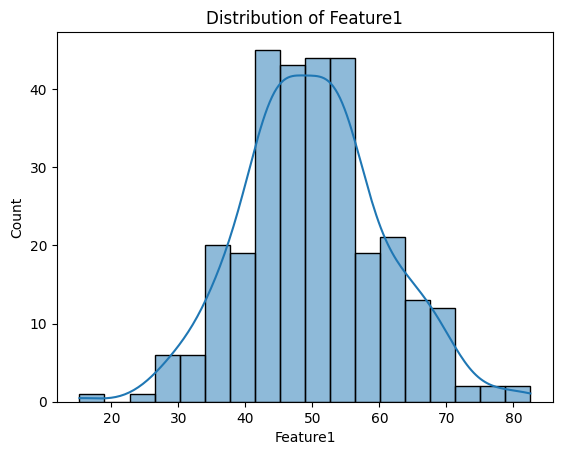

In [ ]:
# step 2: Perform EDA
print("Data types:")
print(df.info())
print("Dataset Overview:")
print(df.head())
print("Dataset Overview at The Bottom of the Dataset:")
print(df.tail())
print("\nSummary Statistics:")
print(df.describe())

sns.histplot(df['Feature1'], kde=True)
plt.title("Distribution of Feature1")

In [ ]:
# step 3: Hypothesis testing
# 1. T-Test: Comparing means Of two groups(Feature1 in group A and B)
group_A = df[df['Group']== 'A']['Feature1']
group_B = df[df['Group']== 'B']['Feature1']
t_stat, p_val = stats.ttest_ind(group_A, group_B)
print(f"T-Test Result: t-stat={t_stat:.3f}, p-value={p_val: .3f}")

T-Test Result: t-stat=-0.242, p-value= 0.809


In [ ]:
# 2. ANOVA: Comparing means across multiple groups (Feature1 across A, B, C)
group_C = df[df['Group']=='c']['Feature1']
anova_stat, anova_p = stats.f_oneway(group_A, group_B, group_C)
print(f"ANOVA Result:F-stat={anova_stat:.3f}, p-value={anova_p:.3f}")

ANOVA Result:F-stat=nan, p-value=nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [ ]:
# 3. Ch-square Test: Relationship between two categorical variables
contingency_table = pd.crosstab(df['Category1'], df['Category2'])
chi2_stat, chi2_p, _, _ = stats.chi2_contingency(contingency_table)
print(f"Chi-square test: chi2-stat={chi2_stat: .3f}, p-value={chi2_p:.3f}")

Chi-square test: chi2-stat= 0.019, p-value=0.991


In [ ]:
# 4. kolmogorov-smirnov test: Check if Feature1 follows a normal distribution
ks_stat, ks_p= stats.kstest(df['Feature1'], 'norm', args= (df['Feature1'].mean(), df['Feature1'].std()))
print(f"Kolmogorov-Smirnov Test: KS-stat={ks_stat:.3f}, p-value={ks_p:.3f}")

Kolmogorov-Smirnov Test: KS-stat=0.040, p-value=0.705
